# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(2000, 96)

In [ ]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.fillna(0)

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,0.00,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2456,14.00,8,7.87,1,0,1982,29,19.00,"6,000.00",...,1,1,0,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",...,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",...,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df_data.duplicated().values.any()

True

In [ ]:
data = df_data.drop_duplicates()

## Descriptive Statistics

In [ ]:
data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [ ]:
data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

## Visualise the Features

In [ ]:
# Set the number of columns and rows for subplots
num_cols = 4
num_rows = int(np.ceil(len(data.columns) / num_cols))

# Create subplots
fig, axs = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(6*num_cols, 3*num_rows), dpi=200)

# Loop through each column and create histogram in a separate subplot
for i, column in enumerate(data.columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=data, x=column, kde=True, color='#2196f3', bins=50, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Count')

# Display the figure
plt.tight_layout()
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
target = data['EARNINGS']
features = data.drop('EARNINGS', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

In [ ]:
train_pct = 100*len(X_train)/len(features)
print(f"Training data is {train_pct:.3}% of the whole data.")

test_pct = 100*X_test.shape[0]/features.shape[0]
print(f"Training data makes up the remaining {test_pct:.3}%.")

Training data is 80.0% of the whole data.
Training data makes up the remaining 20.0%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [ ]:
regr = LinearRegression()

regr.fit(X_train[['S']], y_train)

r_squared = regr.score(X_train[['S']], y_train)
print(f"The Training data r-squared is {r_squared:.2} ")

The Training data r-squared is 0.081 


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [ ]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train[['S']].columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.22


In [ ]:
#How many extra dollars can one expect to earn for an additional year of schooling?
xtra_earn = regr_coef.loc['S'].values[0] * 1000
print(f"One can earn ${xtra_earn:.5} with an additional year of schooling.")

One can earn $1219.2 with an additional year of schooling.


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [ ]:
predicted_values = regr.predict(X_train[['S']])
residuals = y_train - predicted_values

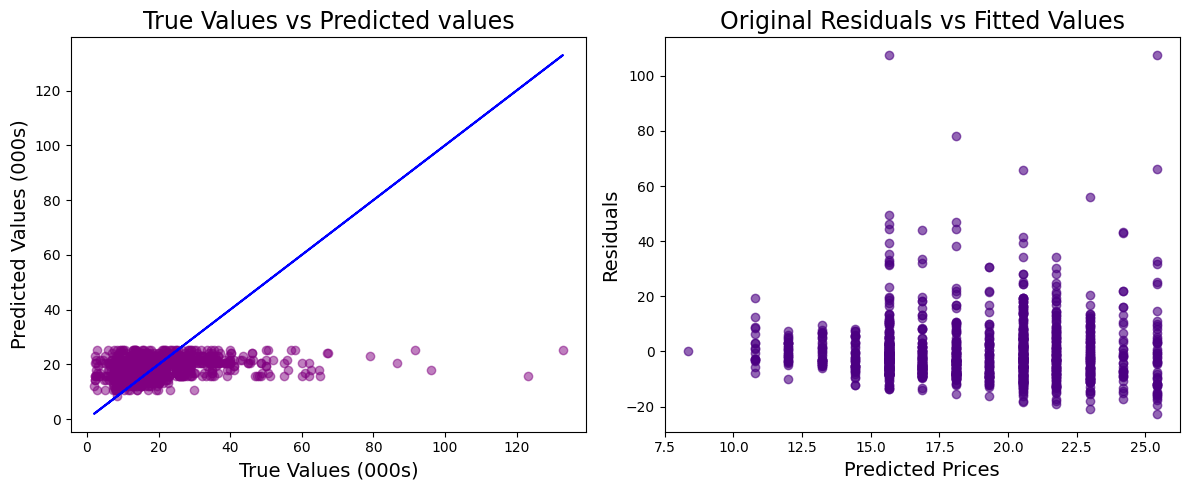

In [56]:
plt.figure(figsize=(12, 5), dpi=100)

plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=predicted_values, color='purple', alpha=0.5)
plt.plot(y_train, y_train, color='blue')
plt.title("True Values vs Predicted values", fontsize=17)
plt.xlabel("True Values (000s)", fontsize=14)
plt.ylabel("Predicted Values (000s)", fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.tight_layout()
plt.show()

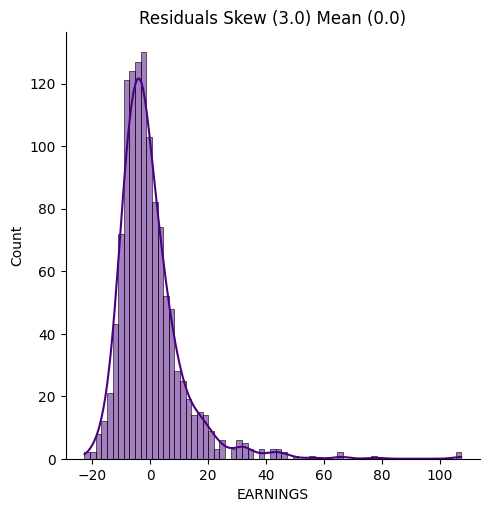

In [ ]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train[['S', 'EXP']], y_train)

r_square = reg.score(X_train[['S', 'EXP']], y_train)
print(f"The R-squared of the training data is: {r_square:.3}.")

The R-squared of the training data is: 0.117.


### Evaluate the Coefficients of the Model

In [ ]:
reg_coef = pd.DataFrame(data=reg.coef_, index=X_train[['S', 'EXP']].columns, columns=['Coef'])
reg_coef

,Coef
S,1.79
EXP,0.98


### Analyse the Estimated Values & Regression Residuals

In [ ]:
predicted_vals = reg.predict(X_train[['S', 'EXP']])
resids = y_train - predicted_vals

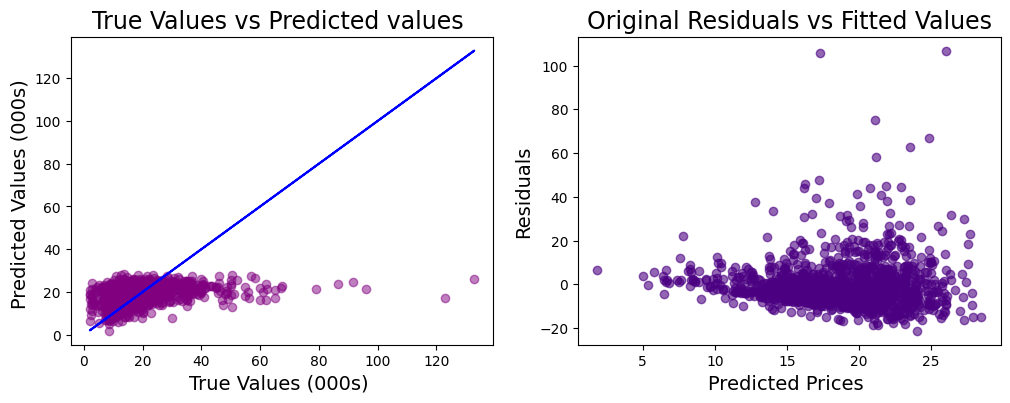

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4), dpi=100)

# Plot True Values vs Predicted Values
axs[0].scatter(x=y_train, y=predicted_vals, color='purple', alpha=0.5)
axs[0].plot(y_train, y_train, color='blue')
axs[0].set_title("True Values vs Predicted values ", fontsize=17)
axs[0].set_xlabel("True Values (000s) ", fontsize=14)
axs[0].set_ylabel("Predicted Values (000s) ", fontsize=14)

# Plot Residuals vs Predicted Values
axs[1].scatter(x=predicted_vals, y=resids, c='indigo', alpha=0.6)
axs[1].set_title('Original Residuals vs Fitted Values', fontsize=17)
axs[1].set_xlabel('Predicted Prices ', fontsize=14)
axs[1].set_ylabel('Residuals', fontsize=14)

plt.show()

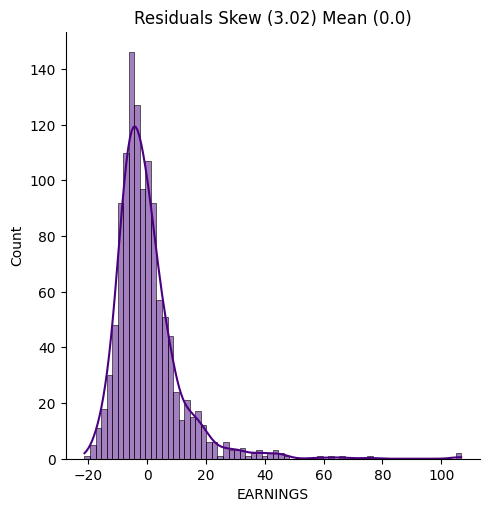

In [ ]:
resids_mean = round(resids.mean(), 2)
resids_skew = round(resids.skew(), 2)

sns.displot(resids, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resids_skew}) Mean ({resids_mean})')
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [ ]:
# Starting Point: Average Values in the Dataset
features = data.drop(['EXP'], axis=1)
average_vals = features.mean().values

earnings_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), columns=features.columns)
earnings_stats

,ID,EARNINGS,S,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,"3,547.13",18.81,14.56,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",362.26,...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00


In [ ]:
earnings_stats['S'] = 16
earnings_stats['EXP'] = 5

# Make prediction
earning = reg.predict(earnings_stats[['S', 'EXP']])[0]
print(f"A person with bachelors degree (12 + 4) years of schooling and 5 years work experience would be expected to earn {earning:.4} thousand dollars")

A person with bachelors degree (12 + 4) years of schooling and 5 years work experience would be expected to earn 19.71 thousand dollars


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [ ]:
new_target = np.log(data['EARNINGS'])
new_features = data.drop('EARNINGS', axis=1)

logX_train, logX_test, log_y_train, log_y_test = train_test_split(new_features,
                                                                  new_target,
                                                                  test_size=0.2,
                                                                  random_state=10)
log_r = LinearRegression()
log_r.fit(logX_train[['S', 'EXP']], log_y_train)

logr_squared = log_r.score(logX_train[['S', 'EXP']], log_y_train)
print(f"The R-squared for the training data is {logr_squared:.2} ")

The R-squared for the training data is 0.16 


In [ ]:
log_coef = pd.DataFrame(data=log_r.coef_, index=logX_train[['S', 'EXP']].columns, columns=['Coefficient'])
log_coef

,Coefficient
S,0.10
EXP,0.06


In [ ]:
log_predictions = log_r.predict(X_train[['S', 'EXP']])
log_residuals = log_y_train - log_predictions

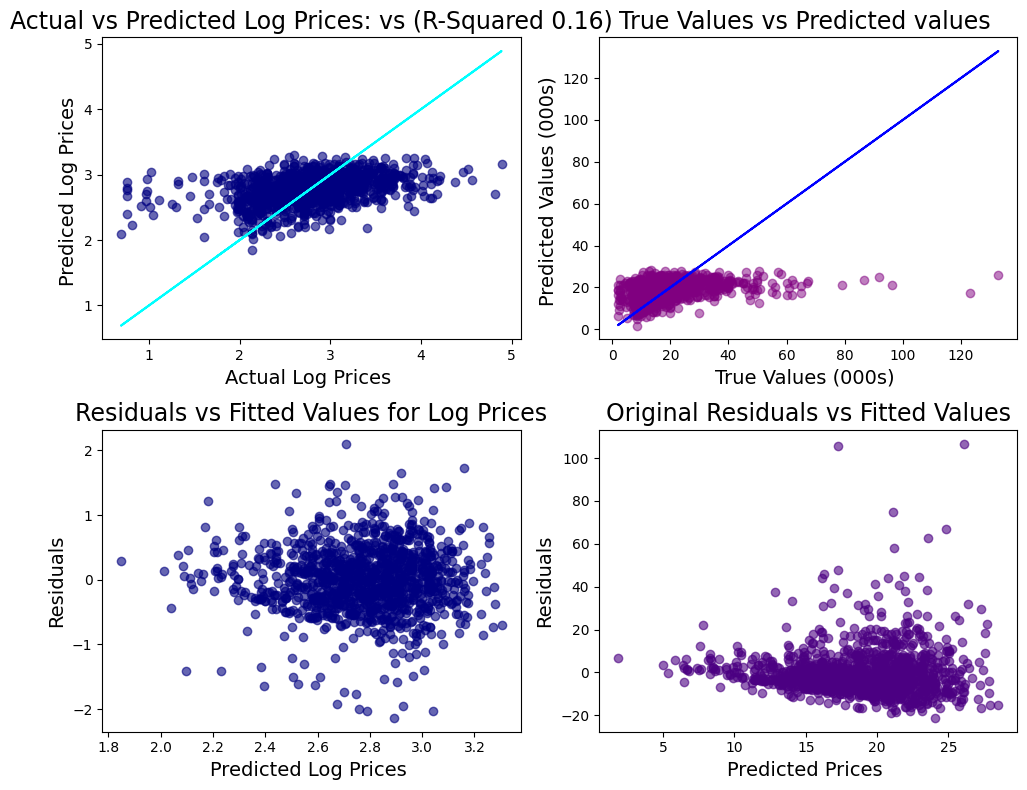

In [ ]:
# create subplots with a 2x2 grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# plot Actual vs. Predicted Log Prices
axs[0, 0].scatter(x=log_y_train, y=log_predictions, c='navy', alpha=0.6)
axs[0, 0].plot(log_y_train, log_y_train, color='cyan')
axs[0, 0].set_title(f'Actual vs Predicted Log Prices: vs (R-Squared {logr_squared:.2})', fontsize=17)
axs[0, 0].set_xlabel('Actual Log Prices ', fontsize=14)
axs[0, 0].set_ylabel('Prediced Log Prices ', fontsize=14)

# plot Original Regression of Actual vs. Predicted Prices
axs[0, 1].scatter(x=y_train, y=predicted_vals, color='purple', alpha=0.5)
axs[0, 1].plot(y_train, y_train, color='blue')
axs[0, 1].set_title("True Values vs Predicted values ", fontsize=17)
axs[0, 1].set_xlabel("True Values (000s) ", fontsize=14)
axs[0, 1].set_ylabel("Predicted Values (000s) ", fontsize=14)

# plot Residuals vs Predicted values (Log prices)
axs[1, 0].scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
axs[1, 0].set_title('Residuals vs Fitted Values for Log Prices', fontsize=17)
axs[1, 0].set_xlabel('Predicted Log Prices ', fontsize=14)
axs[1, 0].set_ylabel('Residuals', fontsize=14)

# plot Residuals vs Predicted values
axs[1, 1].scatter(x=predicted_vals, y=resids, c='indigo', alpha=0.6)
axs[1, 1].set_title('Original Residuals vs Fitted Values', fontsize=17)
axs[1, 1].set_xlabel('Predicted Prices ', fontsize=14)
axs[1, 1].set_ylabel('Residuals', fontsize=14)

# adjust spacing between subplots
plt.tight_layout()

# display the figure
plt.show()

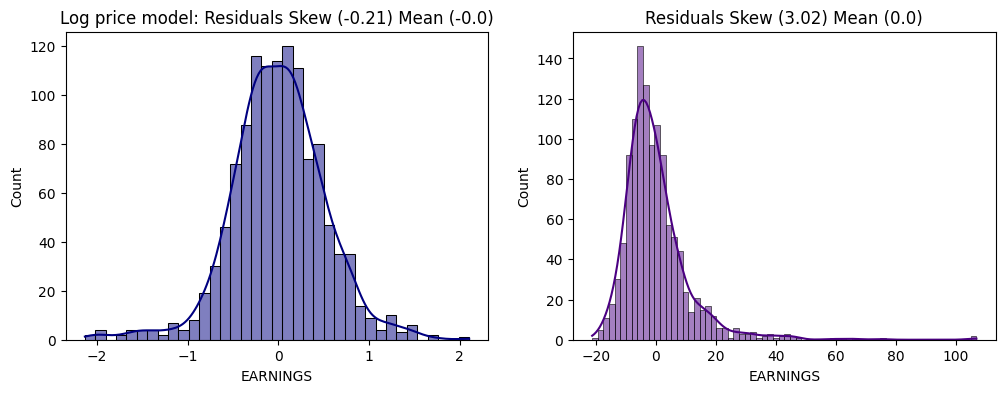

In [53]:
# Distribution of Residuals (log prices) - checking for normality
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

# create subplots
fig, axs = plt.subplots(ncols=2, figsize=(12,4), dpi=100)

# plot histogram of log residuals
sns.histplot(log_residuals, kde=True, color='navy', ax=axs[0])
axs[0].set_title(f'Log price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')

# plot histogram of residuals
sns.histplot(resids, kde=True, color='indigo', ax=axs[1])
axs[1].set_title(f'Residuals Skew ({resids_skew}) Mean ({resids_mean})')

# display the figure
plt.show()


In [54]:
print(f"Original Model Test Data r-squared: {r_square:.3}.")
print(f"Log Model Test Data r-squared: {logr_squared:.2} ")

Original Model Test Data r-squared: 0.117.
Log Model Test Data r-squared: 0.16 


In [55]:
# Make prediction with the log values
log_earning = log_r.predict(earnings_stats[['S', 'EXP']])[0]
print(f"The log earning estimate of a person with bachelors degree (12 + 4) years of schooling and 5 years work experienceis: ${log_earning:.3}.")

# Convert Log Prices to Acutal Dollar Values
earning_est = np.exp(log_earning) * 1000
print(f'The property is estimated to be worth ${earning_est:.6}')

The log earning estimate of a person with bachelors degree (12 + 4) years of schooling and 5 years work experienceis: $2.82.
The property is estimated to be worth $16767.8
